<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Support Vector Machines (SVMs)

## Learning Objectives

*After this lesson, students will be able to:*
1. **Describe** linear separability.
2. **Differentiate between** maximal margin, soft-margin, and kernel SVMs
3. **Implement** SVMs in `scikit-learn`.
4. **Describe** the effects of `C` and kernels on SVMs.

## Agenda
I. **Support Vector Machines** (60 minutes total)
- Intuition
- An SVM Play, in Three Acts:
    1. Maximal Margin SVMs
    1. Soft-margin SVMs
    1. Kernel SVMs
- Kernel Trick

II. **Coding** (30 minutes total)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

### Wine quality data
We'll read in the familiar wine quality data, except this time we'll attempt to predict whether wine is either red or white.

In [2]:
wine = pd.read_csv('./data/winequality_merged.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
wine['red_wine'].value_counts()

0    4898
1    1599
Name: red_wine, dtype: int64

In [5]:
wine['red_wine'].value_counts(normalize = True)

0    0.753886
1    0.246114
Name: red_wine, dtype: float64

In [6]:
X = wine.drop(columns = ['red_wine', 'quality'])

sc = StandardScaler()

X_sc = sc.fit_transform(X)

y = wine['red_wine']

In [7]:
from sklearn.svm import LinearSVC

In [8]:
params = {'C': np.linspace(0.0001, 1, 20)}

In [10]:
# (THREAD) Instantiate and fit a gridsearch model for this SVC!

svc = LinearSVC()

gcv = GridSearchCV(svc, params, cv = 5, n_jobs = -1)

gcv.fit(X_sc, y)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 5.27263158e-02, 1.05352632e-01, 1.57978947e-01,
       2.10605263e-01, 2.63231579e-01, 3.15857895e-01, 3.68484211e-01,
       4.21110526e-01, 4.73736842e-01, 5.26363158e-01, 5.78989474e-01,
       6.31615789e-01, 6.84242105e-01, 7.36868421e-01, 7.89494737e-01,
       8.42121053e-01, 8.94747368e-01, 9.47373684e-01, 1.00000000e+00])})

In [11]:
gcv.best_score_

0.9935359744181914

In [12]:
gcv.best_params_

{'C': 0.15797894736842105}

In [13]:
svc = LinearSVC()

svc.fit(X_sc, y)

svc.score(X_sc, y)

/Users/henrybutler/opt/anaconda3/envs/dsir-111/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9944589810681853

In [14]:
svc = LinearSVC(max_iter = 1000)

svc.fit(X_sc, y)

svc.score(X_sc, y)

/Users/henrybutler/opt/anaconda3/envs/dsir-111/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9944589810681853

In [15]:
svc = LinearSVC(max_iter = 4000)

svc.fit(X_sc, y)

svc.score(X_sc, y)

/Users/henrybutler/opt/anaconda3/envs/dsir-111/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9944589810681853

In [16]:
svc = LinearSVC(max_iter = 5000)

svc.fit(X_sc, y)

svc.score(X_sc, y)

0.9944589810681853

/Users/henrybutler/opt/anaconda3/envs/dsir-111/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henrybutler/opt/anaconda3/envs/dsir-111/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henrybutler/opt/anaconda3/envs/dsir-111/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henrybutler/opt/anaconda3/envs/dsir-111/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/henrybutler/opt/anaconda3/envs/dsir-111/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

---

In [17]:
# dot product

a = np.array([1, 2, 3])

b = np.array([4, 5, 6])

np.dot(a, b)

32

In [18]:
1*4 + 2*5 + 3*6

32

# Kernel SVMs on the MNIST data

### Hyperparameters of SVMs
SVMs will have two main hyperparameters: `C` and `kernel`.

#### Parameter: `C`
`C` controls how much we regularize the boundary that is fit between classes.
- **If `C` is small**: We regularize substantially, leading to a less perfect classification of our training data.
- **If `C` is large**: We do not regularize much, leading to a more perfect classification of our training data.

(THREAD) As we increase `C`, what happens to our bias-variance tradeoff?

#### Parameter: `kernel`
There are several options:
* `linear`, `rbf`, `polynomial`, `sigmoid`, or something custom

**Which do we use?**
- **Quick answer**: As long as it's not the linear kernel, it actually matters surprisingly little!
- **Lazy answer**: Use the RBF kernel, as it's usually best (or no different from other options).
- **Better answer**: It's a model parameter that you're free to gridsearch over!

## Coding with [MNIST Digits Dataset](https://en.wikipedia.org/wiki/MNIST_database)

In [19]:
# Import packages.
from sklearn import datasets
from sklearn.svm import SVC

In [20]:
# Load digits.
digits = datasets.load_digits()

# Check out data.
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [21]:
type(digits)

sklearn.utils.Bunch

In [22]:
digits['data'] # can treat kind of like a dict

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [23]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [24]:
# How many observations do we have?
# NOTE: Data is in a NumPy array!
print(type(digits.data))

digits.data.shape

<class 'numpy.ndarray'>


(1797, 64)

In [25]:
digits.images[42]

array([[ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16., 12.,  0.,  0.],
       [ 0.,  0.,  1., 12., 16., 11.,  0.,  0.],
       [ 0.,  2., 12., 16., 16., 10.,  0.,  0.],
       [ 0.,  6., 11.,  5., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  8.,  0.,  0.]])

In [26]:
digits.data[42]

array([ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
       12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
       12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
        0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
       16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.])

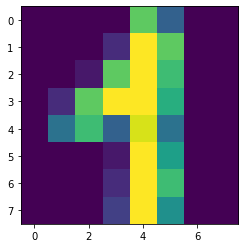

In [27]:
# Visualize an instance.
img = digits['images'][42]

plt.imshow(img)

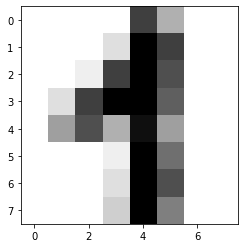

In [29]:
# Visualize an instance in gray scale

plt.imshow(
digits.images[42],
cmap = 'gray_r');

In [30]:
# What is the actual class?
digits.target[42]

1

In [31]:
# Create X and y.
X, y = digits.data, digits.target

In [32]:
# Train/Test Split.

X_train, X_test, y_train, y_test = train_test_split(
X,
y,
test_size = 0.33,
random_state = 42)

In [33]:
X.shape

(1797, 64)

In [34]:
pd.Series(y).value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [35]:
# Train/Test Split.

X_train, X_test, y_train, y_test = train_test_split(
X,
y,
test_size = 0.33,
random_state = 42,
stratify = y)

In [36]:
# Instantiate support vector machine.

svc = SVC(gamma = 'scale')

In [37]:
# Fit support vector machine to training data.

svc.fit(X_train, y_train)

SVC()

In [38]:
# Generate predictions.
y_pred = svc.predict(X_test)

In [39]:
pd.Series(y).value_counts(normalize = True)

3    0.101836
1    0.101280
5    0.101280
4    0.100723
6    0.100723
9    0.100167
7    0.099610
0    0.099054
2    0.098497
8    0.096828
dtype: float64

In [40]:
# Measure performance based on accuracy.
print('train score: ', svc.score(X_train, y_train))
print('test score: ', svc.score(X_test, y_test))

train score:  0.99833748960931
test score:  0.98989898989899


<details><summary>Is accuracy the best metric to use here? Why or why not?</summary>

- Accuracy is likely the best metric to use here. Improperly classifying a number is equally bad, no matter what number you incorrectly predict. For example, misclassifying a `4` as a `3` or `5` or `9` is equally bad.
- Many of our other classification metrics (like sensitivity and specificity) don't easily generalize to classification with more than two classes.
</details>

### Spend three minutes trying different hyperparameter values. (Feel free to guess and check or use GridSearch/RandomizedSearch!) We'll report our best values in a moment.

In [41]:
# Instantiate SVM.
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(5, shuffle = True, random_state = 42)

params = {
    'C': np.linspace(0.001, 100, 25),
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [2, 3], # only relevant for poly kernel
    'gamma': ['scale', 'auto']
}

model = SVC(random_state = 42)

gs = GridSearchCV(model, params, cv = kf, n_jobs = -1, verbose = 1)

# Fit on training data.
gs.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.0000000e-03, 4.1676250e+00, 8.3342500e+00, 1.2500875e+01,
       1.6667500e+01, 2.0834125e+01, 2.5000750e+01, 2.9167375e+01,
       3.3334000e+01, 3.7500625e+01, 4.1667250e+01, 4.5833875e+01,
       5.0000500e+01, 5.4167125e+01, 5.8333750e+01, 6.2500375e+01,
       6.6667000e+01, 7.0833625e+01, 7.5000250e+01, 7.9166875e+01,
       8.3333500e+01, 8.7500125e+01, 9.1666750e+01, 9.5833375e+01,
       1.0000000e+02]),
                         'degree': [2, 3], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=1)

In [42]:
# Evaluate model
gs.best_params_

{'C': 4.167625, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [43]:
gs.best_score_

0.9925138312586446

In [44]:
gs.score(X_test, y_test)

0.98989898989899

In [45]:
# Create DataFrame with column for predicted values.
results = pd.DataFrame(svc.predict(X_test), columns = ['predicted'])

# Create column for observed values.
results['actual'] = y_test

In [46]:
# Check out first five rows.
results.head()

,predicted,actual
0,6,6
1,2,2
2,3,3
3,2,2
4,2,2


In [47]:
# Find all indices where predicted and true results 
# aren't the same, then save in an array.

row_ids = results[results['predicted'] != results['actual']].index

print(row_ids)

Int64Index([154, 223, 328, 347, 373, 425], dtype='int64')


In [49]:
# Create function that shows image, then 
# prints predicted and true values.
def print_number(index):
    plt.imshow(X_test[index].reshape((8, 8)), cmap = 'gray_r')
    plt.show()
    print(f"The model guessed this was: {results.loc[index, 'predicted']}.")
    print(f"This actually is: {results.loc[index, 'actual']}.")
    print()

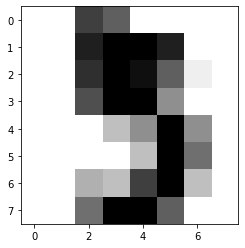

The model guessed this was: 9.
This actually is: 5.



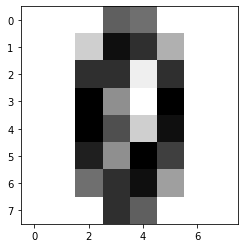

The model guessed this was: 4.
This actually is: 0.



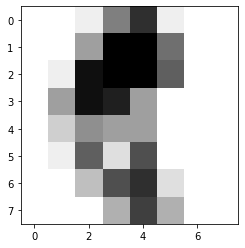

The model guessed this was: 1.
This actually is: 8.



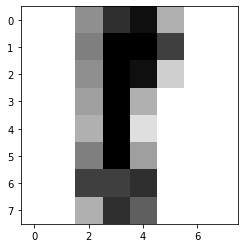

The model guessed this was: 1.
This actually is: 8.



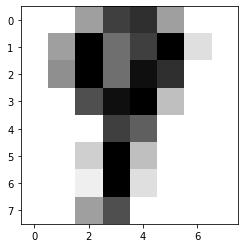

The model guessed this was: 7.
This actually is: 9.



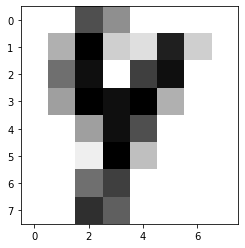

The model guessed this was: 8.
This actually is: 4.



In [50]:
# Use for loop to visualize all mistakes.

for value in row_ids:
    print_number(value)

### Support Vector Machines aren't even just for classification!

SVMs can be used for regression problems as well! The main ideas are the same - we still specify a cost tolerance `C` and a kernel - but [it's a bit more complicated](https://www.saedsayad.com/support_vector_machine_reg.htm). (For example, visualizing a "margin" is easier to do when we're separating two classes than when we're trying to predict some continuous outcome.) For this reason, we won't get into the mathematical details of support vector machines applied to regression, but we can instantiate a model using `svr = sklearn.svm.SVR()` and `.fit()`, `.predict()` like we do with all of our other models! Check out the documentation for [regression SVMs here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

### Pros and Cons of SVMs

#### Pros
- Exceptional perfomance (historically widely used)
- Effective in high-dimensional data
- Can work with non-linear boundaries
- Fast to compute with most datasets (kernel trick)
- Low risk of overfitting

#### Cons
- Black box method
- Can be slow on large datasets

# Concluding Remarks and Fun Facts
* SVMs are fantastic models if all you care about is predictive ability.
* They are complete and total black boxes, sorry.
* You must scale your data.
* By the way, doing a kernel SVM with polynomial kernel degree = 2 has been shown to work really well for NLP data!